In [ ]:
# GENERATE FRESH DATA (run this to create new model comparisons)
# This takes 15-30 minutes but gives you the latest model results

# Uncomment the line below and run to generate fresh comparison data:
!cd .. && python scripts/run_model_comparison.py

🏈 Fantasy Draft Model Comparison Runner

🚀 Running model: espn_conservative
   Description: ESPN data with conservative variance


In [1]:
# DATA GENERATION (OPTIONAL)
# Run this cell to generate fresh model comparison data

import os

# Check if comparison data exists
data_file = "../data/model-comparisons/player_survival_comparison.csv"
data_exists = os.path.exists(data_file)

print(f"Data file exists: {data_exists}")
if data_exists:
    print(f"File: {data_file}")
    print("✅ Using existing data for visualization")
else:
    print("❌ No comparison data found")

print("\nTo generate fresh data (takes 15-30 minutes), run:")
print("!cd .. && python scripts/run_model_comparison.py")
print("\nThen re-run the visualization cells below.")

Data file exists: True
File: ../data/model-comparisons/player_survival_comparison.csv
✅ Using existing data for visualization

To generate fresh data (takes 15-30 minutes), run:
!cd .. && python scripts/run_model_comparison.py

Then re-run the visualization cells below.


Loading survival data...
Models detected: ['adp_baseline', 'espn_conservative', 'espn_moderate', 'espn_aggressive']
Positions: ['QB', 'RB', 'TE', 'WR']
Data shape: (800, 7)


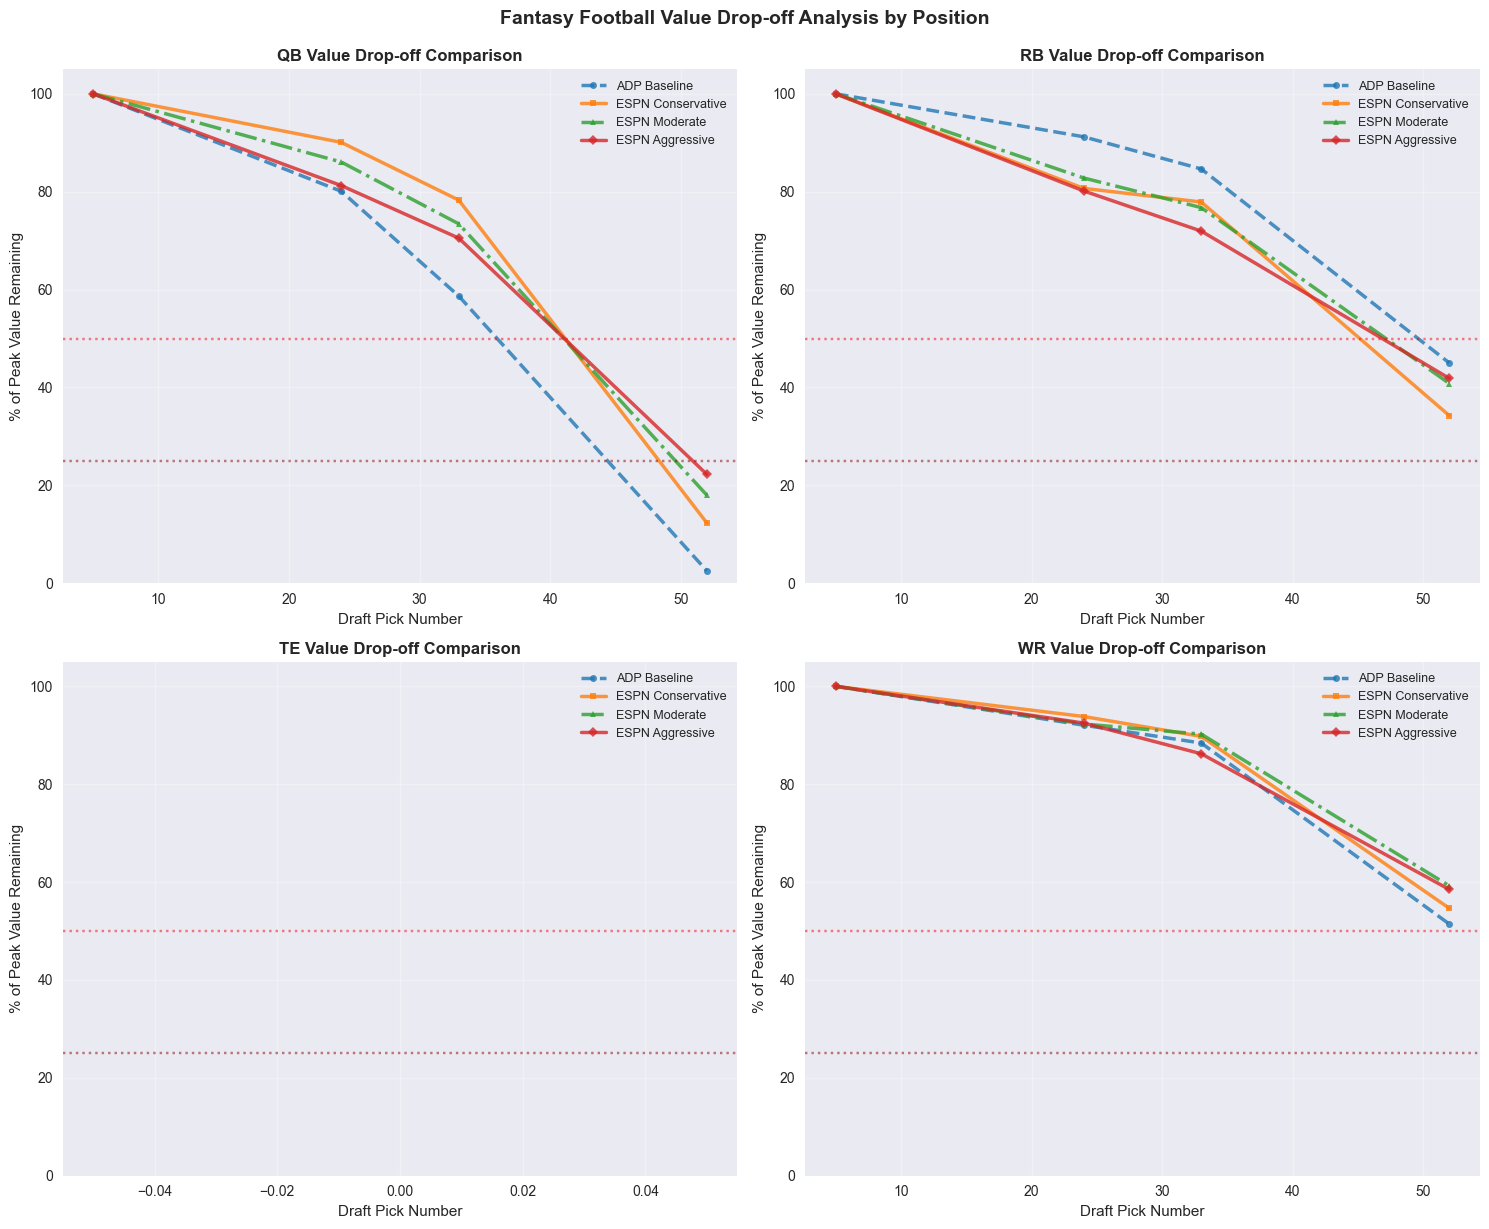


MODEL SIMILARITY ANALYSIS

QB Position - Model Correlations:
-----------------------------------
📊 Similar: adp_baseline vs espn_conservative (r=0.983)
⚠️  VERY SIMILAR: adp_baseline vs espn_moderate (r=0.994)
⚠️  VERY SIMILAR: adp_baseline vs espn_aggressive (r=0.997)
⚠️  VERY SIMILAR: espn_conservative vs espn_moderate (r=0.997)
📊 Similar: espn_conservative vs espn_aggressive (r=0.987)
⚠️  VERY SIMILAR: espn_moderate vs espn_aggressive (r=0.997)

RB Position - Model Correlations:
-----------------------------------
⚠️  VERY SIMILAR: adp_baseline vs espn_conservative (r=0.990)
📊 Similar: adp_baseline vs espn_moderate (r=0.988)
📊 Similar: adp_baseline vs espn_aggressive (r=0.968)
⚠️  VERY SIMILAR: espn_conservative vs espn_moderate (r=0.998)
📊 Similar: espn_conservative vs espn_aggressive (r=0.987)
⚠️  VERY SIMILAR: espn_moderate vs espn_aggressive (r=0.995)

TE Position - Model Correlations:
-----------------------------------

WR Position - Model Correlations:
----------------------

In [2]:
# Value Drop-off Charts - Enhanced Analysis
# Compares player value degradation across different draft models

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Setup path and imports
sys.path.append(os.path.join(os.path.dirname(''), '..', 'scripts'))
from value_dropoff_utils import load_survival_long, list_models, order_models, make_position_curve_multi

# Configuration
CSV_PATH = "../data/model-comparisons/player_survival_comparison.csv"
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

# Load and process data
print("Loading survival data...")
long_df = load_survival_long(CSV_PATH)

# Detect all models and positions
models = order_models(list_models(long_df))
positions = sorted(long_df['position'].dropna().unique().tolist())

print(f"Models detected: {models}")
print(f"Positions: {positions}")
print(f"Data shape: {long_df.shape}")

# Enhanced styling with distinct colors and line styles for overlapping data
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
style_map = {
    'adp_baseline': ('--', colors[0], 'ADP Baseline', 'o'),
    'espn_conservative': ('-', colors[1], 'ESPN Conservative', 's'), 
    'espn_moderate': ('-.', colors[2], 'ESPN Moderate', '^'),
    'espn_aggressive': ('-', colors[3], 'ESPN Aggressive', 'D'),
    'test_model': (':', colors[4], 'Test Model', 'v')
}

def get_style(model: str):
    if model in style_map:
        return style_map[model]
    # Default for unknown models
    return ('-', colors[-1], model.replace('_', ' ').title(), 'o')

# Create enhanced plots for each position (all 4 positions)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, pos in enumerate(positions):
    ax = axes[i]
    
    # Generate curve data
    curve = make_position_curve_multi(long_df, pos, models=models)
    pivot = curve.pivot(index='pick', columns='model', values='pct_of_peak')
    
    # Plot each model with distinct styling
    for m in models:
        if m in pivot.columns:
            linestyle, color, label, marker = get_style(m)
            pivot[m].plot(ax=ax, linestyle=linestyle, color=color, 
                         marker=marker, markersize=5, linewidth=2.5, 
                         label=label, alpha=0.8)
    
    # Enhance plot appearance
    ax.set_title(f'{pos} Value Drop-off Comparison', fontsize=12, fontweight='bold')
    ax.set_xlabel('Draft Pick Number')
    ax.set_ylabel('% of Peak Value Remaining')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper right', fontsize=9)
    
    # Add value cliff indicators (50% and 25% lines)
    ax.axhline(y=50, color='red', linestyle=':', alpha=0.5, label='50% Cliff')
    ax.axhline(y=25, color='darkred', linestyle=':', alpha=0.5, label='25% Cliff')
    
    # Set y-axis limits for better comparison
    ax.set_ylim(0, 105)

plt.tight_layout()
plt.suptitle('Fantasy Football Value Drop-off Analysis by Position', 
             fontsize=14, fontweight='bold', y=1.02)
plt.show()

# Data overlap analysis
print("\n" + "="*60)
print("MODEL SIMILARITY ANALYSIS")
print("="*60)

for pos in positions:
    curve = make_position_curve_multi(long_df, pos, models=models)
    pivot = curve.pivot(index='pick', columns='model', values='pct_of_peak')
    
    print(f"\n{pos} Position - Model Correlations:")
    print("-" * 35)
    
    # Calculate correlation matrix to identify overlapping models
    if len(pivot.columns) > 1:
        corr_matrix = pivot.corr()
        for i, model1 in enumerate(models):
            for j, model2 in enumerate(models):
                if i < j and model1 in corr_matrix.columns and model2 in corr_matrix.columns:
                    corr = corr_matrix.loc[model1, model2]
                    if corr > 0.99:
                        print(f"⚠️  VERY SIMILAR: {model1} vs {model2} (r={corr:.3f})")
                    elif corr > 0.95:
                        print(f"📊 Similar: {model1} vs {model2} (r={corr:.3f})")

# Summary statistics
print("\n" + "="*60)
print("VALUE DROP-OFF SUMMARY")
print("="*60)

for pos in positions:
    curve = make_position_curve_multi(long_df, pos, models=models)
    pivot = curve.pivot(index='pick', columns='model', values='pct_of_peak')
    
    print(f"\n{pos} Position Analysis:")
    print("-" * 25)
    
    for model in models:
        if model in pivot.columns:
            data = pivot[model].dropna()
            if len(data) > 0:
                # Find cliff points
                cliff_50 = data[data <= 50].index.min() if any(data <= 50) else "None"
                cliff_25 = data[data <= 25].index.min() if any(data <= 25) else "None"
                
                print(f"{model:15s}: 50% cliff at pick {cliff_50}, 25% cliff at pick {cliff_25}")

print(f"\nData source: {CSV_PATH}")
print(f"Analysis completed for {len(models)} models across {len(positions)} positions")